In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

Compiling complete dataframe

In [2]:
df_lsa = pd.read_csv("df_lsa_elbow.csv")

In [3]:
df_no_lsa = pd.read_csv("df_final_mlp.csv")

In [4]:
df_no_lsa = df_no_lsa.drop(['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'lsa_5',
 'lsa_6',
 'lsa_7',
 'lsa_8',
 'lsa_9',
 'lsa_10',
 'lsa_11',
 'lsa_12',
 'lsa_13',
 'lsa_14',
 'lsa_15',
 'lsa_16',
 'lsa_17',
 'lsa_18',
 'lsa_19',
 'lsa_20',
 'lsa_21',
 'lsa_22',
 'lsa_23',
 'lsa_24',
 'lsa_25',
 'lsa_26',
 'lsa_27',
 'lsa_28',
 'lsa_29',
 'lsa_30'], axis = 1)

In [5]:
df_no_lsa

,hybrid,indica,sativa,anxiety,anxious,aroused,arthritis,creative,depression,dizzy,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,1,0,0,0,0,0,0,0,0,1,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,1,0,0,0,0,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,1,0,0,0,0,1,0,1,0,1,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,1,0,0,0,0,0,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,1,0,0,0,0,0,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


In [6]:
df_mlp = pd.concat([df_lsa, df_no_lsa], axis = 1)

In [7]:
df_mlp.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'woody',
 'X..D

In [8]:
df_mlp

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,anxious,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


In [9]:
X = df_mlp.drop(['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol'], axis = 1)
y = df_mlp[['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol']]

Train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [11]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [12]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

In [13]:
mean_absolute_error(y_val, y_pred_mlp)

0.08975524066772367

In [14]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.18288062505730068

In [15]:
#val
r2_score(y_val, y_pred_mlp)

0.1322766789631449

Residual plots for each target variable

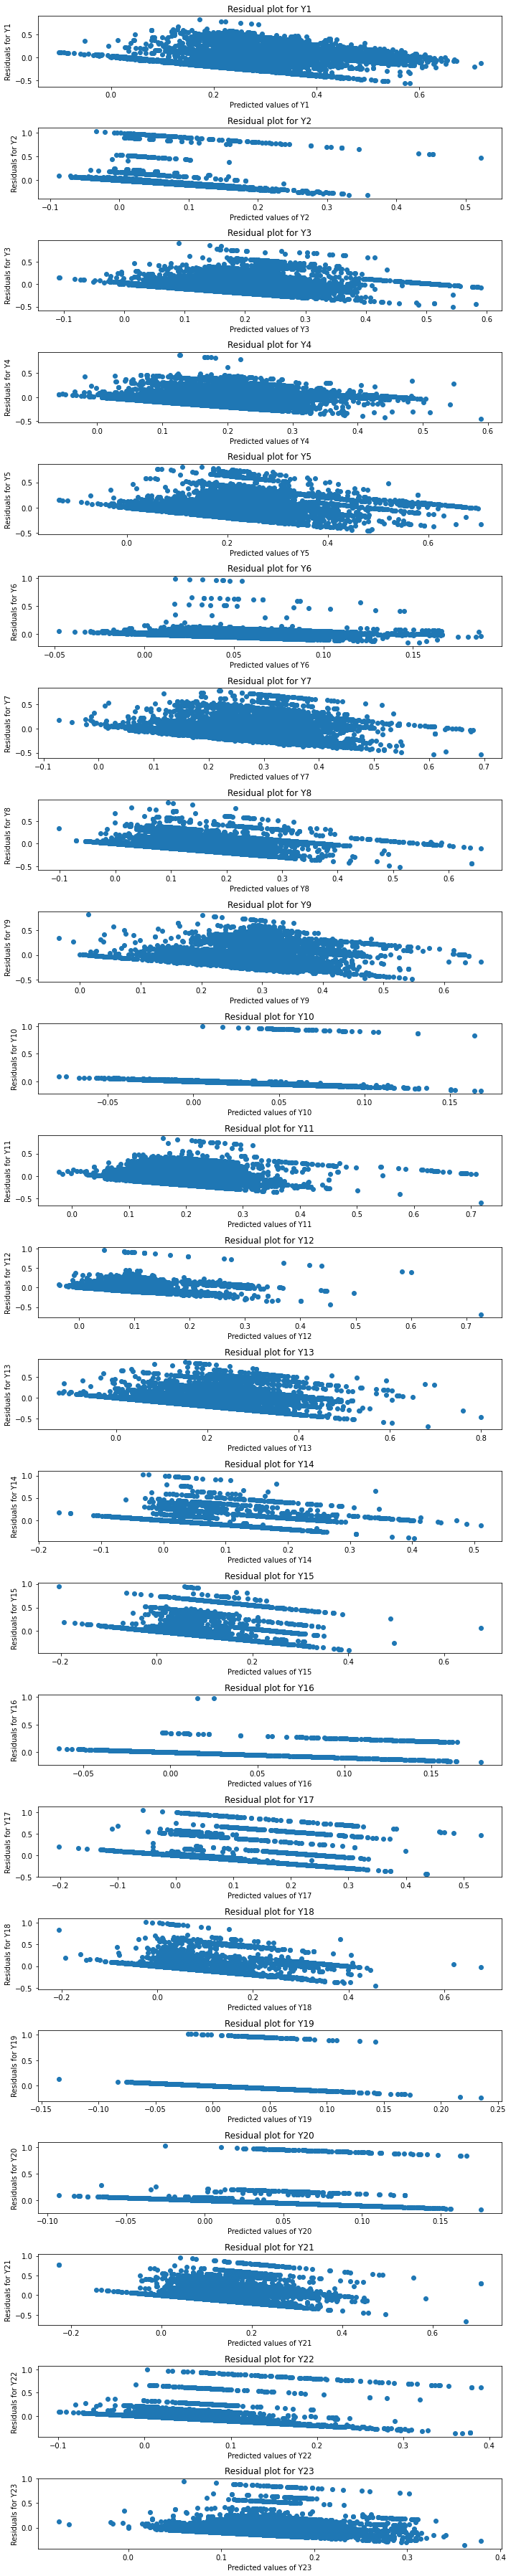

In [16]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_mlp[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_mlp[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

Feature Selection

In [17]:
rfreg = RandomForestRegressor()

In [18]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

In [19]:
selector.estimator_.feature_importances_

array([1.15604966e-01, 1.10183925e-01, 1.15816124e-01, 1.16966206e-01,
       1.16477136e-01, 1.18345659e-02, 2.60189416e-02, 5.37420925e-03,
       3.00091046e-04, 3.90979398e-03, 6.94529584e-03, 3.23338357e-05,
       1.07193693e-02, 3.56455789e-04, 5.44001325e-03, 7.85523464e-03,
       1.02926867e-02, 9.80878008e-03, 3.10849936e-05, 1.17752326e-02,
       5.30397770e-05, 2.65876428e-05, 1.11102549e-02, 8.99071438e-03,
       1.25937083e-02, 3.59277989e-03, 9.97220756e-03, 3.70583453e-04,
       2.77528379e-05, 4.05858318e-03, 1.34865923e-02, 4.15475779e-05,
       1.03701841e-02, 7.12749558e-07, 0.00000000e+00, 8.83037909e-03,
       9.01000833e-03, 1.21951799e-02, 1.49494125e-03, 7.16649678e-04,
       3.54382449e-04, 7.01304132e-03, 4.71970868e-04, 1.07770196e-02,
       9.48263652e-04, 7.66920889e-03, 2.17455038e-03, 7.28059097e-04,
       8.53701080e-03, 2.69575150e-03, 1.67633682e-02, 1.16047037e-02,
       5.41832509e-03, 1.93997052e-03, 6.41378299e-03, 1.08901661e-03,
      

In [20]:
selector.threshold_

0.011627906976744184

In [21]:
mask = selector.get_support()

In [22]:
mask

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [23]:
selected_features = X.columns[mask]

In [24]:
selected_X = df_mlp[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,euphoric,happy,relaxed,uplifted,diesel,lemon,vanilla
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,1,0,1,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,1,1,1,1,0,0,1
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,1,1,0,0,0,0,1
3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,1,0,1,1,0,0,0
4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,1,1,1,0,0,0,0
42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,0,0,0,0
42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,1,0,0,0,0,0,0
42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,1,1,1,1,0,0,0


In [25]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'euphoric',
 'happy',
 'relaxed',
 'uplifted',
 'diesel',
 'lemon',
 'vanilla']

In [26]:
import joblib

joblib.dump(selector, "selector_mlp_lsa_elbow.pkl")
joblib.dump(selected_X, "selected_X_mlp_lsa_elbow.pkl")
joblib.dump(rfreg, "mlp_rfreg_lsa_elbow.pkl")
joblib.dump(mlpreg, "mlp_lsa_elbow.pkl")

['mlp_lsa_elbow.pkl']

Train test split (after Feature Selection)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [28]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [29]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

In [30]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.09428817288734474

In [31]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.0886117816704309

In [32]:
#val
r2_score(y_val, y_pred_mlpreg)

0.07612710294269856

Hyperparameter Tuning

In [33]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [34]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [35]:
rscv.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [36]:
rscv.best_params_

{'max_iter': 500, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu'}

In [37]:
joblib.dump(rscv, "rscv_mlp_lsa_elbow.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_lsa_elbow_best_params.pkl")

['rscv_mlp_lsa_elbow_best_params.pkl']

MLP fit (after hyperparameter tuning)

In [54]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=500, activation = 'relu', hidden_layer_sizes= (50,100,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.09442852232082824

In [56]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.0892731523794035

In [57]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.07563377706246281

Residual plots after Hyperparameter Tuning

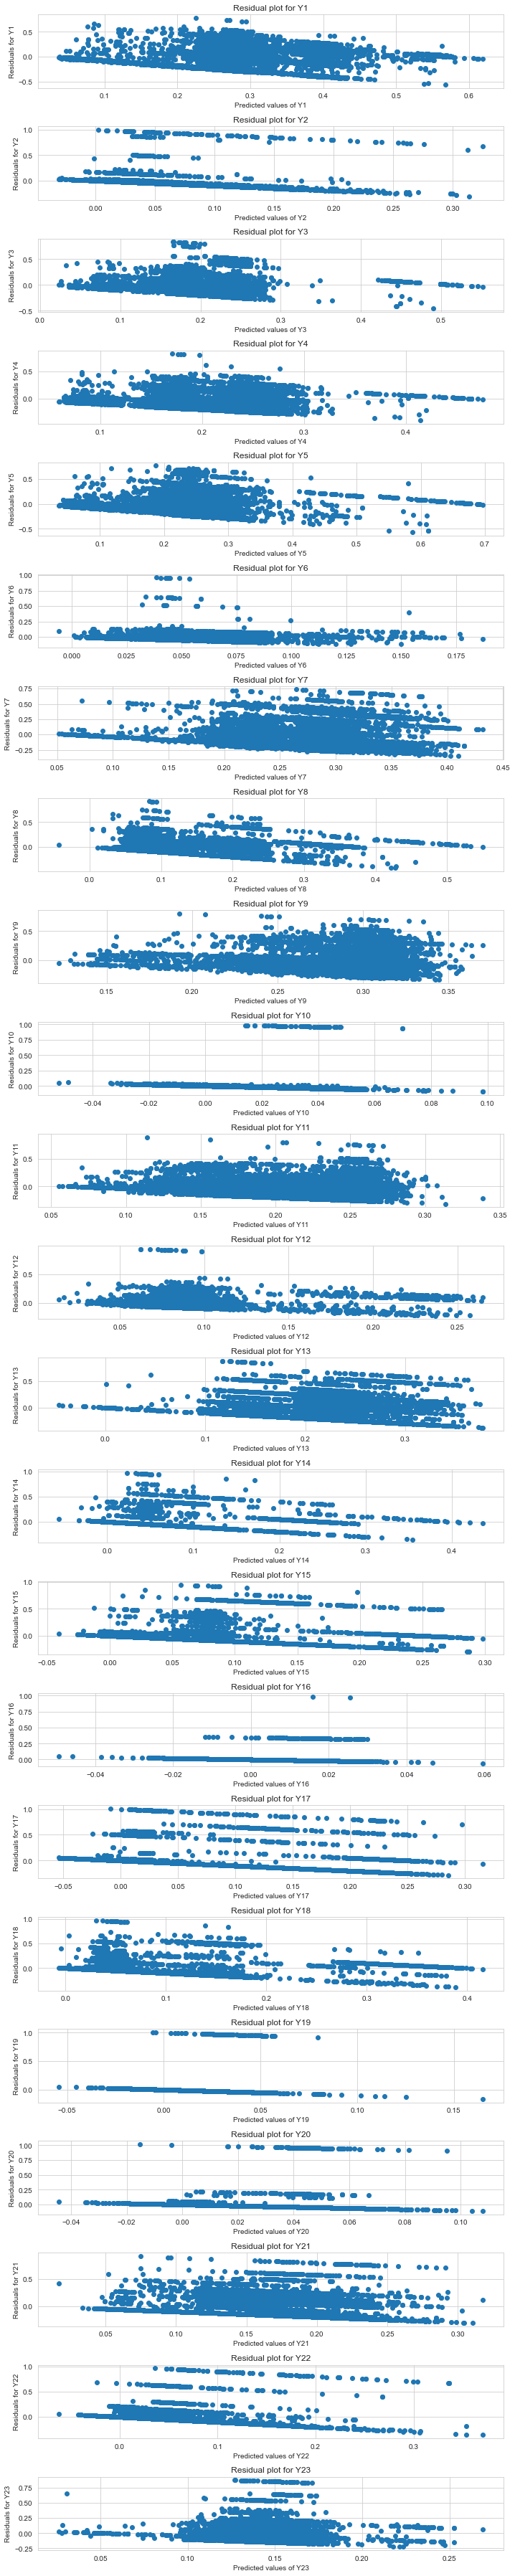

In [58]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_mlp_ht[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_mlp_ht[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

Predicting model on the test set

In [59]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_lsa_elbow.pkl")
joblib.dump(y_test, "y_test_mlpreg_lsa_elbow.pkl")

['y_test_mlpreg_lsa_elbow.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.09444486945098383

In [62]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.02343583033870344

In [63]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.1474795052188596

In [64]:
r2_score(y_test, y_pred_mlpreg_test)

0.08137313525001114

Error analysis

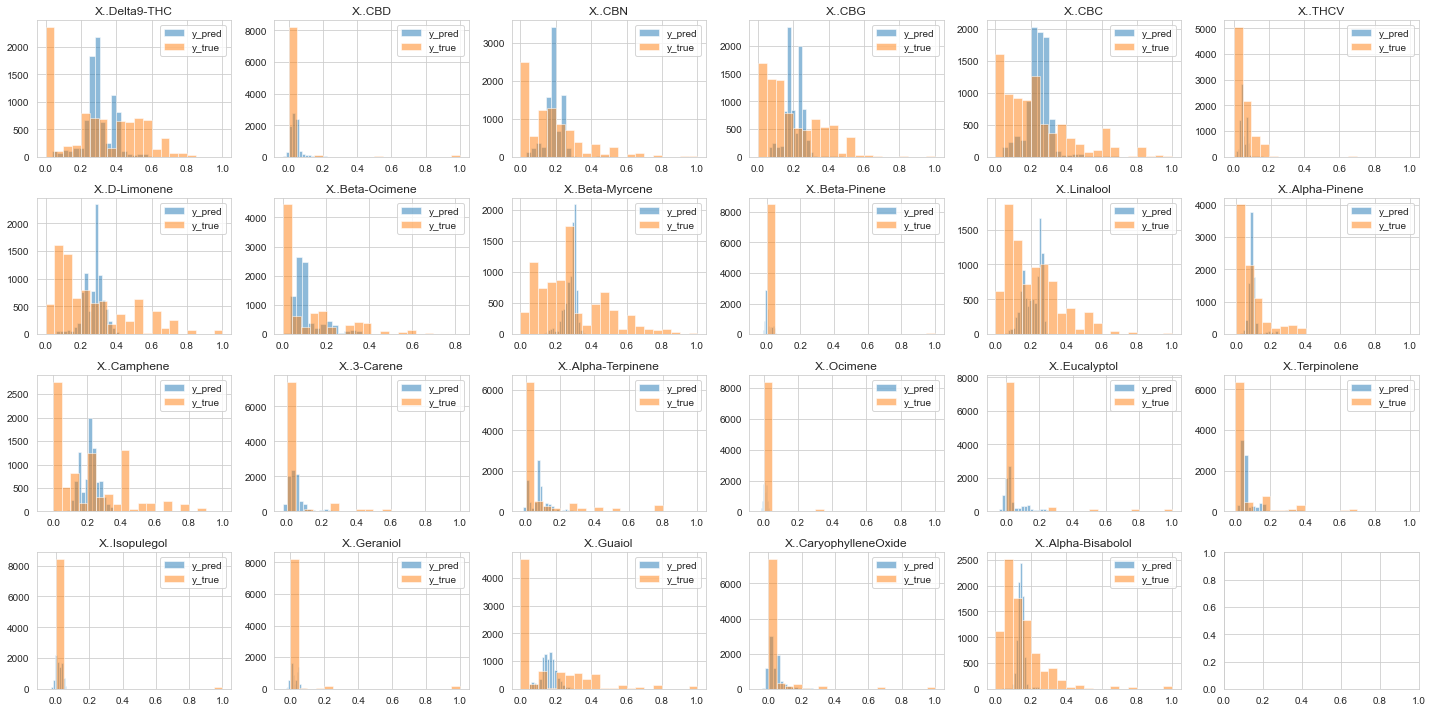

<Figure size 432x288 with 0 Axes>

In [65]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(y_pred_mlpreg_test[:, i], alpha=0.5, label='y_pred', bins=20)
    axs[row, col].hist(y_test.iloc[:, i], alpha=0.5, label='y_true', bins=20)
    axs[row, col].legend(loc='upper right')
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()
plt.savefig('error_hist_mlp_lsa_elbow.png')

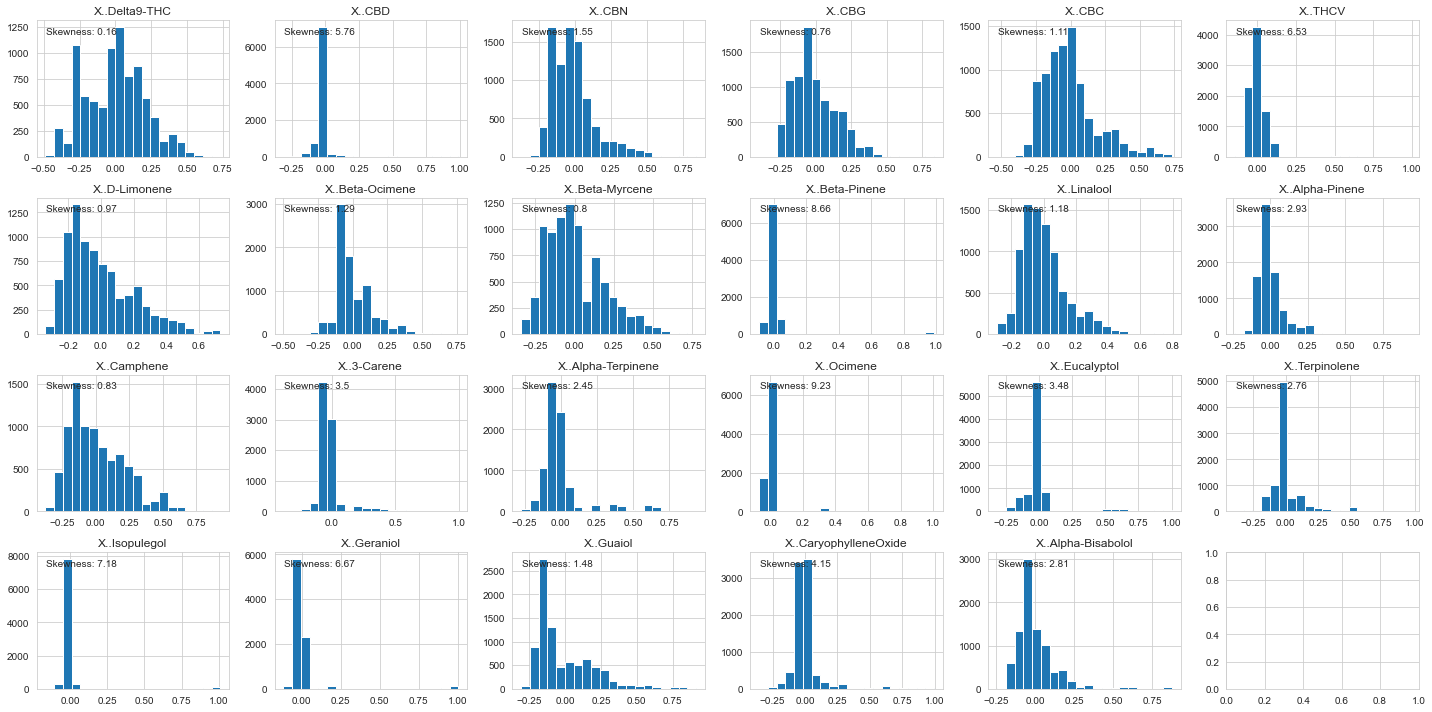

<Figure size 432x288 with 0 Axes>

In [66]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
errors = y_test - y_pred_mlpreg_test
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(errors.iloc[:, i], bins=20)
    axs[row, col].set_title(column)
    axs[row, col].text(0.05, 0.9, f"Skewness: {np.round(errors.iloc[:, i].skew(), 2)}", transform=axs[row, col].transAxes)

plt.tight_layout()
plt.show()
plt.savefig('error_skew_mlp_lsa_elbow.png')

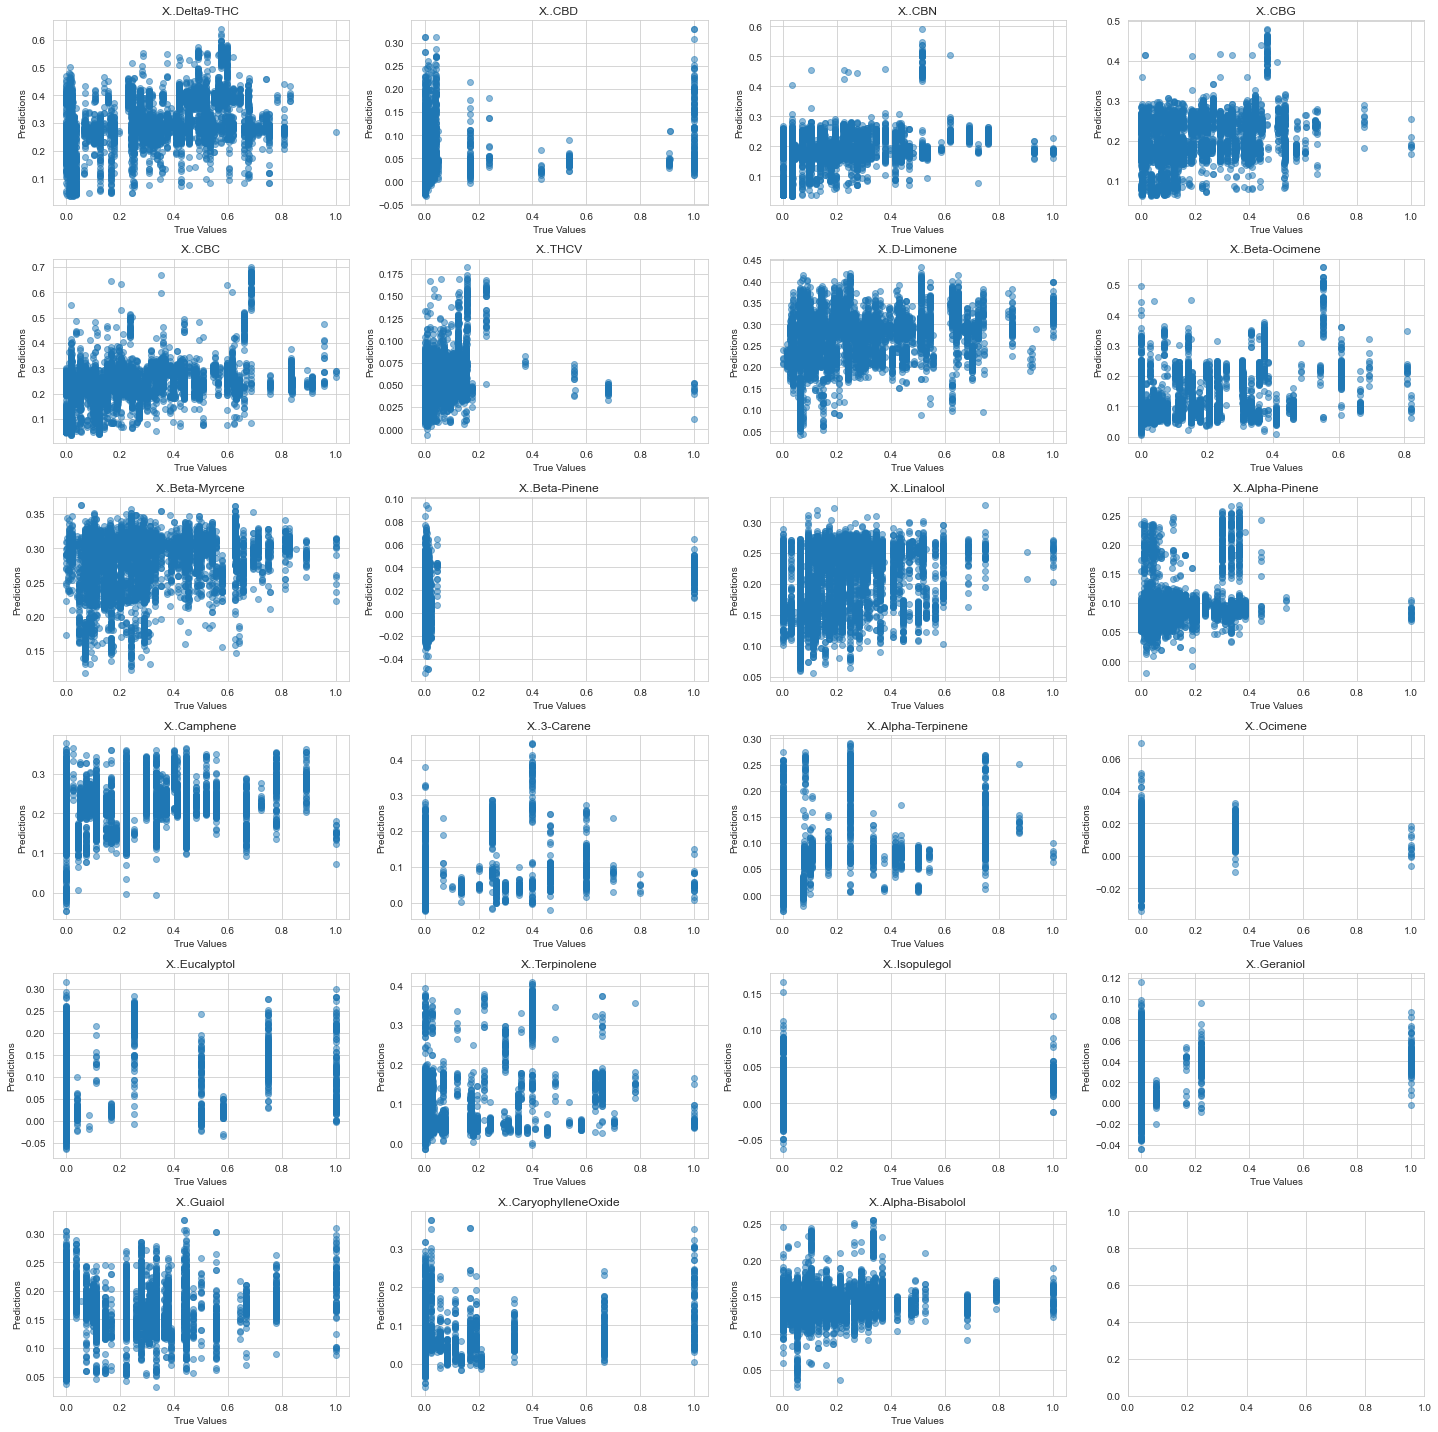

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))

for i, column in enumerate(y_test.columns):
    row = i // 4
    col = i % 4
    axs[row, col].scatter(y_test.iloc[:, i], y_pred_mlpreg_test[:, i], alpha=0.5)
    axs[row, col].set_xlabel('True Values')
    axs[row, col].set_ylabel('Predictions')
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()

Pearson R

In [68]:
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_mlpreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    print(f"Target {i}: Pearson correlation coefficient={r_i}, p-value={p_i}")

Target 0: Pearson correlation coefficient=0.3637476491152986, p-value=3.3211841454839107e-267
Target 1: Pearson correlation coefficient=0.25422939106245024, p-value=6.911137908078228e-127
Target 2: Pearson correlation coefficient=0.3224700992721376, p-value=3.315678845732179e-207
Target 3: Pearson correlation coefficient=0.3364379676148466, p-value=1.715831461514277e-226
Target 4: Pearson correlation coefficient=0.3459842063953946, p-value=2.9025406863881716e-240
Target 5: Pearson correlation coefficient=0.2740682137595456, p-value=6.0063394503600595e-148
Target 6: Pearson correlation coefficient=0.26153940791147845, p-value=1.9496170404259728e-134
Target 7: Pearson correlation coefficient=0.454670159614563, p-value=0.0
Target 8: Pearson correlation coefficient=0.1778282765721634, p-value=5.206740621888187e-62
Target 9: Pearson correlation coefficient=0.1695401215767806, p-value=1.8928726721477134e-56
Target 10: Pearson correlation coefficient=0.31260906333024213, p-value=3.40334935683

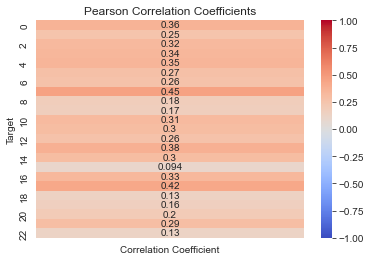

In [69]:
import seaborn as sns

results = []
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_mlpreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    results.append({
        'Target': i,
        'Correlation Coefficient': r_i,
        'P-value': p_i
    })

df = pd.DataFrame(results)

sns.set_style("whitegrid")
corr_heatmap = sns.heatmap(df.pivot_table(index='Target', columns=None, values='Correlation Coefficient'),
                           annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
corr_heatmap.set_title('Pearson Correlation Coefficients')

plt.savefig('pearson_heatmap_mlp_lsa_elbow.png')